# Presentation of the Ford GoBike Data Analysis
## by Chinemelum Nwaeze

## Investigation Overview


> The major variable of interest in this analysis is the time spent cycling. This analysis sought to determine how other variables like gender and age affect the time spent cycling


## Dataset Overview

> This dataset consist of data about cyclers in the year 2019 and their usage of bike as recorded by Ford GoBike. There was a total of over 180,000 records, this was reduced to over 160,000 after wrangling processes were carried out

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Ford_data = pd.read_csv('The Ford GoBike Data Analysis')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of time spent cycling

> The distribution of the time spent cycling seen in the duration_mins column is unimodal having 6 minutes as the most time period spent by cyclers cycling. The time ranges from 1 minute to 25 minutes. As time spent cycling increases, the number of cyclers reduces.

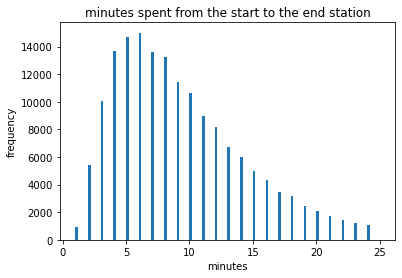

In [3]:
bins = np.arange(1.0, 25 + 0.2, 0.2)
plt.hist(data = Ford_data, x = 'duration_mins', bins = bins);
def plot_func(plt, xlabel, ylabel, title):
    """""Create a function that helps to add title and label to the visual"""""
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
plot_func(plt,'minutes','frequency','minutes spent from the start to the end station')

## Gender distribution

> Gender here consist of Male, Female and Others. Since I am looking at proportions of a whole, pie chart is the best visuals to convey the message. Therein the number of male cyclers recorded was more than half of the total cyclers.

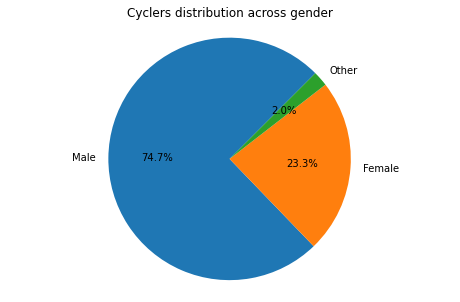

In [4]:
plt.figure(figsize = [8,5])
gender_dist = Ford_data['member_gender'].value_counts()
plt.pie(gender_dist, labels = gender_dist.index, startangle = 45,autopct='%1.1f%%');
plt.axis('equal');
plt.title('Cyclers distribution across gender');

## Gender Versus Duration

The time spent by each gender flows in the same direction with more cyclers in each gender distribution spending lesser time cycling. Going to show that gender holds little on the duration spent cycling. The male gender distribution chat is more visible because there are more male in the observations recorded.

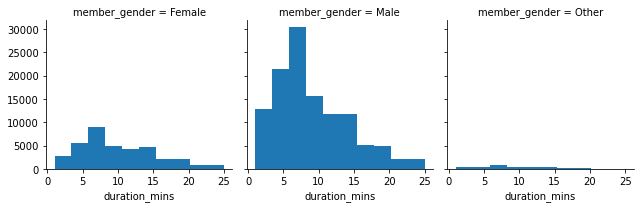

In [5]:
g = sb.FacetGrid(data = Ford_data, col = 'member_gender')
g.map(plt.hist, 'duration_mins');

## Age versus Time Duration 

For ease of visualization and interpretation, I have grouped the ages into ranges of 10. The chart shows we have more of those in the age bracket of 28 - 37, but this does not mean that they spend more time cycling. 
Age here also has no significant impact on the time spent cycling

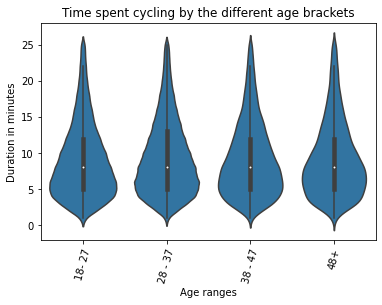

In [6]:
bins = np.arange(18,54 + 10, 10)
labels = ['18- 27', '28 - 37', '38 - 47','48+']
Ford_data['age_range'] = pd.cut(Ford_data.age, bins, labels = labels, include_lowest = True)

color = sb.color_palette()[0]
sb.violinplot(data = Ford_data, x = 'age_range', y = 'duration_mins', color = color);
plt.xticks(rotation = 75);
plot_func(plt, 'Age ranges', 'Duration in minutes', 'Time spent cycling by the different age brackets')

## Time spent by each gender given the user type

I brought in the user type variable here, which judges if the cycler is a subscriber or a customer and then looks at the time spent by each gender distributio of the user type while cycling.
The chart below shows customers to cycle for a longer period of time than the subscribers irrespective of the gender, it also shows more female cycling for longer period than other gender supporting the previous analysis.

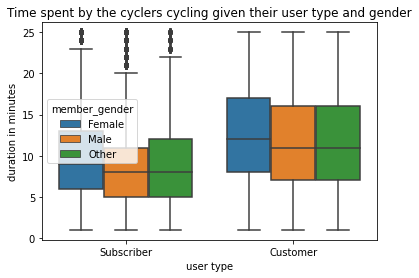

In [7]:
sb.boxplot(data = Ford_data,x = 'user_type', y = 'duration_mins',hue = 'member_gender');
plot_func(plt,'user type','duration in minutes','Time spent by the cyclers cycling given their user type and gender')

### Time spent cycling by partakers and non-partakers in the bike sharing program given user type

The white space in the second quadrant seen below goes to affirm that no customer partook in the bike share for all trip program. Despite this, customers spend on the average a longer period cycling than subscribers, subscribers who partook in the program spent the least time cycling.

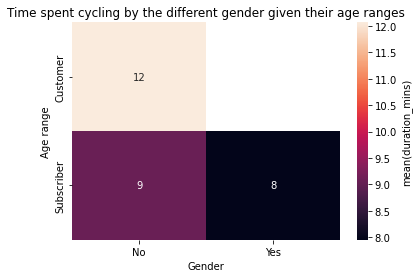

In [8]:
duration_means = Ford_data.groupby(['user_type', 'bike_share_for_all_trip']).mean()['duration_mins']
duration_means = duration_means.reset_index(name = 'duration_mins_avg')
duration_means = duration_means.pivot(index = 'user_type', columns = 'bike_share_for_all_trip',
                            values = 'duration_mins_avg')
sb.heatmap(duration_means, annot = True,  fmt = '.0f',
           cbar_kws = {'label' : 'mean(duration_mins)'});
plot_func(plt, 'Gender', 'Age range','Time spent cycling by the different gender given their age ranges');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.
 --post serve --SlidesExporter.reveal_theme=simple


Summarily neither gender nor age was a major determinant of the time spend cycling. The bike share for all trip program was strictly for subscribers. The number of cyclers subscribers who partook in the program was quite poor.


In [ ]:
!jupyter nbconvert Chinemelum_Nwaeze_Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt